# Machine Learning Homework 3

## Random Data Generator

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_random_gaussian_data(m, s):
    # Implement Box-Muller method
    rand_num = (np.random.random(), np.random.random())
    rand_data = np.sqrt(-2*np.log(rand_num[0]))*np.cos(2*np.pi*rand_num[1])
    return rand_data * np.sqrt(s) + m

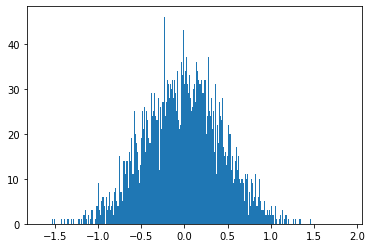

In [4]:
# Verify by visualizing the distribution

m, s = 0, 0.2
num_data = 10000

data = [generate_random_gaussian_data(m, s) for i in range(num_data)]
plt.hist(data, bins=1000)
plt.show()

In [5]:
def generate_random_xy_data(a, w):
    x = np.random.random()*2-1
    x_power = np.array([pow(x, i) for i in range(w.size)])
    return x, w.dot(x_power)+generate_random_gaussian_data(0, a)

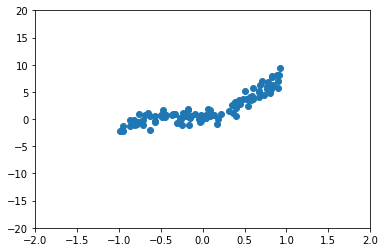

In [6]:
# verify by visualizing the distribution

a, w = 1, np.array([1,2,3,4])
num_data = 100

points = [generate_random_xy_data(a, w) for i in range(num_data)]
x, y = [p[0] for p in points], [p[1] for p in points]
plt.plot(x, y, 'o')
plt.axis([-2, 2, -20, 20])
plt.show()

## Sequential Estimator

In [8]:
source_m, source_s = 5, 1

m, s = 0, 0
threshold = 0.001
n = 1

print('Data point source function: N({}, {})'.format(source_m, source_s))
print()

while True:
    data = generate_random_gaussian_data(source_m, source_s)
    estimate_m = (((n-1)*m)+data)/n
    estimate_s = s+(((data-m)**2)/n)-(s/(n-1)) if n > 1 else 0
    
    print('Add data point: {}'.format(data))
    print('Mean = {}, Variance = {}'.format(estimate_m, estimate_s))
    
    if np.absolute(estimate_m - m) < threshold and np.absolute(estimate_s - s) < threshold:
        break
    else:
        m, s = estimate_m, estimate_s
        n += 1
    
print()
print('Estimation result:')
print('Mean = {}, Variance = {}'.format(estimate_m, estimate_s))

Data point source function: N(5, 1)

Add data point: 5.365988571341331
Mean = 5.365988571341331, Variance = 0
Add data point: 3.8006586912100295
Mean = 4.583323631275681, Variance = 1.2251288168159378
Add data point: 5.132108000906699
Mean = 4.76625175448602, Variance = 0.7129525031917403
Add data point: 6.104063401387039
Mean = 5.100704666211275, Variance = 0.9227366694404979
Add data point: 5.431098243534154
Mean = 5.166783381675851, Variance = 0.7138844852676154
Add data point: 6.211330250069854
Mean = 5.340874526408185, Variance = 0.7529539482593788
Add data point: 4.640716155785244
Mean = 5.240851902033478, Variance = 0.6974933012571068
Add data point: 5.487266110116382
Mean = 5.271653678043841, Variance = 0.6054413963206606
Add data point: 3.406969636883849
Mean = 5.064466562359398, Variance = 0.9160997299313292
Add data point: 4.100182629474235
Mean = 4.968038169070882, Variance = 0.9072952213721182
Add data point: 4.823753249490067
Mean = 4.954921358199898, Variance = 0.8184582

## Baysian Linear Regression

In [32]:
b, n, a, w = 1, 4, 1, np.array([1,2,3,4])

x, y = generate_random_xy_data(a, w)
X = np.array([pow(x, p) for p in range(n)]).reshape(1, n)
Y = np.array(y)
var = a*X.T.dot(X) + b*np.identity(n)
mean = a*np.linalg.inv(var).dot(X.T).dot(Y)
x_pow = np.array([pow(x, p) for p in range(n)])
predictive_mean = float(mean.T.dot(x_pow))
predictive_var = 1/a + x_pow.dot(np.linalg.inv(var)).dot(x_pow)
points = [(x, y)]

print('Add data point ({}, {})'.format(x, y), end='\n\n')
print('Posterior mean:')
print(mean, end='\n\n')
print('Posterior variance:')
print(var, end='\n\n')
print('Predictive distribution ~ N({}, {})'.format(predictive_mean, predictive_var))
print('------------------------------------------------')

iteration = 0
while iteration < 1000:
    x, y = generate_random_xy_data(a, w)
    X = np.append(X, [[pow(x, p) for p in range(n)]], axis=0)
    Y = np.append(Y, y)
    S = np.linalg.inv(var)
    var = a*X.T.dot(X) + S
    mean = np.linalg.inv(var).dot(a*X.T.dot(Y).reshape(n, 1) + S.dot(mean))
    x_pow = np.array([pow(x, p) for p in range(n)])
    predictive_mean = float(mean.T.dot(x_pow))
    predictive_var = 1/a + x_pow.dot(np.linalg.inv(var)).dot(x_pow)
    points.append((x, y))
    
    print('Add data point ({}, {})'.format(x, y), end='\n\n')
    print('Posterior mean:')
    print(mean, end='\n\n')
    print('Posterior variance:')
    print(var, end='\n\n')
    print('Predictive distribution ~ N({}, {})'.format(predictive_mean, predictive_var))
    print('------------------------------------------------')
    
    iteration += 1
    
    if iteration == 10:
        points_10 = points.copy()
        var_10 = var.copy()
        mean_10 = mean.copy()
    if iteration == 50:
        points_50 = points.copy()
        var_50 = var.copy()
        mean_50 = mean.copy()

Add data point (-0.7870836494161839, -1.7912180860429272)

Posterior mean:
[[-0.55266865]
 [ 0.43499645]
 [-0.3423786 ]
 [ 0.2694806 ]]

Posterior variance:
[[ 2.         -0.78708365  0.61950067 -0.48759885]
 [-0.78708365  1.61950067 -0.48759885  0.38378108]
 [ 0.61950067 -0.48759885  1.38378108 -0.30206781]
 [-0.48759885  0.38378108 -0.30206781  1.23775264]]

Predictive distribution ~ N(-1.2385494407027653, 1.6914565291370574)
------------------------------------------------
Add data point (-0.5426529069254036, 1.1847861928940793)

Posterior mean:
[[ 0.05454065]
 [ 0.3284258 ]
 [-0.46001483]
 [ 0.47142353]]

Posterior variance:
[[ 2.69145653 -1.08688704  0.72282996 -0.49694959]
 [-1.08688704  1.72282996 -0.49694959  0.3520818 ]
 [ 0.72282996 -0.49694959  1.3520818  -0.25592229]
 [-0.49694959  0.3520818  -0.25592229  1.18993043]]

Predictive distribution ~ N(-0.3344738174614803, 1.3881790173376027)
------------------------------------------------
Add data point (-0.15985777981212745, 0

Posterior mean:
[[0.95994064]
 [2.17938223]
 [3.35433784]
 [3.57512179]]

Posterior variance:
[[1.86012922e+02 8.74173589e-02 6.33069792e+01 4.51197345e+00]
 [8.74173589e-02 6.34180323e+01 4.51495323e+00 3.71471804e+01]
 [6.33069792e+01 4.51495323e+00 3.73371039e+01 4.83875775e+00]
 [4.51197345e+00 3.71471804e+01 4.83875775e+00 2.65975652e+01]]

Predictive distribution ~ N(4.066837243782527, 1.0166811278541503)
------------------------------------------------
Add data point (-0.6559440784140778, -0.2982411065278897)

Posterior mean:
[[0.95934799]
 [2.18397204]
 [3.35219466]
 [3.57207159]]

Posterior variance:
[[187.01287745  -0.56872456  63.73724989   4.22997684]
 [ -0.56872456  63.84744152   4.23275821  37.33328962]
 [ 63.73724989   4.23275821  37.52222857   4.71728816]
 [  4.22997684  37.33328962   4.71728816  26.67609508]]

Predictive distribution ~ N(-0.039030864715136726, 1.014269776947595)
------------------------------------------------
Add data point (0.5676251470726952, 4.5584

------------------------------------------------
Add data point (-0.09570021368439496, 2.207513553395716)

Posterior mean:
[[1.02397591]
 [2.14502302]
 [3.12840642]
 [3.80732661]]

Posterior variance:
[[329.00739819  -5.31823729 114.79933977   2.55724731]
 [ -5.31823729 114.86591955   2.55856816  68.62255618]
 [114.79933977   2.55856816  68.73391487   3.93539897]
 [  2.55724731  68.62255618   3.93539897  48.95600122]]

Predictive distribution ~ N(0.8440113373489563, 1.0073144540949626)
------------------------------------------------
Add data point (0.9115948085874026, 9.573297568495425)

Posterior mean:
[[1.02115547]
 [2.13742667]
 [3.1450145 ]
 [3.83361936]]

Posterior variance:
[[330.00734764  -4.40661666 115.63042964   3.31474694]
 [ -4.40661666 115.6969144    3.31606464  69.31314164]
 [115.63042964   3.31606464  69.42434215   4.56498634]
 [  3.31474694  69.31314164   4.56498634  49.52984298]]

Predictive distribution ~ N(8.48726533664653, 1.021574905140916)
-----------------------

Predictive distribution ~ N(0.5512986019228908, 1.0060040967991999)
------------------------------------------------
Add data point (0.575511019045172, 4.0085213867897505)

Posterior mean:
[[1.02897047]
 [2.06647721]
 [3.15101336]
 [3.856201  ]]

Posterior variance:
[[472.00494894  -5.10913429 160.71734252   4.87789992]
 [ -5.10913429 160.76527171   4.87906306  96.20053849]
 [160.71734252   4.87906306  96.28063019   6.59512707]
 [  4.87789992  96.20053849   6.59512707  68.47440654]]

Predictive distribution ~ N(3.996963530681458, 1.0069758827051534)
------------------------------------------------
Add data point (-0.5812665221402475, -1.081677141209827)

Posterior mean:
[[1.02679572]
 [2.07984415]
 [3.15075748]
 [3.84107009]]

Posterior variance:
[[473.00494227  -5.69043492 161.05521442   4.68154803]
 [ -5.69043492 161.10296997   4.68267613  96.31490227]
 [161.05521442   4.68267613  96.39478669   6.52876427]
 [  4.68154803  96.31490227   6.52876427  68.51272827]]

Predictive distributi

Posterior variance:
[[614.00382627  -2.74587667 211.65240645   4.95291123]
 [ -2.74587667 211.68937231   4.95343062 127.23345303]
 [211.65240645   4.95343062 127.29501173   6.06372795]
 [  4.95291123 127.23345303   6.06372795  90.50983109]]

Predictive distribution ~ N(-0.6575770251897815, 1.0070007825618799)
------------------------------------------------
Add data point (0.8673539608754688, 7.129209813102148)

Posterior mean:
[[1.02096657]
 [2.06685063]
 [3.11593424]
 [3.85758917]]

Posterior variance:
[[615.00382604  -1.87852336 212.40471239   5.60542197]
 [ -1.87852336 212.44167403   5.60595224 127.79940537]
 [212.40471239   5.60595224 127.86093243   6.55464221]
 [  5.60542197 127.79940537   6.55464221  90.93558762]]

Predictive distribution ~ N(7.674910673650126, 1.0087944522535635)
------------------------------------------------
Add data point (-0.7760708190251853, -0.4347250988990722)

Posterior mean:
[[1.02095562]
 [2.06664081]
 [3.11631716]
 [3.85747141]]

Posterior variance:

Add data point (-0.826248180533975, -0.44617400357269704)

Posterior mean:
[[1.0224555 ]
 [2.03430468]
 [3.09375933]
 [3.9122629 ]]

Posterior variance:
[[726.00324813   4.65192945 250.43345089   8.00718458]
 [  4.65192945 250.46470654   8.00737982 150.08418161]
 [250.43345089   8.00737982 150.13639874   7.27775337]
 [  8.00718458 150.08418161   7.27775337 106.40552143]]

Predictive distribution ~ N(-0.7531014344789044, 1.0065636054581368)
------------------------------------------------
Add data point (0.1689666666584475, 2.8624056543454506)

Posterior mean:
[[1.02679072]
 [2.04043885]
 [3.08687359]
 [3.90381736]]

Posterior variance:
[[727.00324785   4.82089582 250.46200367   8.01200593]
 [  4.82089582 250.49325598   8.01220693 150.08499399]
 [250.46200367   8.01220693 150.13718114   7.27791906]
 [  8.01200593 150.08499399   7.27791906 106.40552078]]

Predictive distribution ~ N(1.4785181289886427, 1.003695980843815)
------------------------------------------------
Add data point (0.

Add data point (-0.021449630909473605, 2.3268488069958515)

Posterior mean:
[[1.01288033]
 [1.99447962]
 [3.09916741]
 [3.9734256 ]]

Posterior variance:
[[804.0028998   11.54738893 271.91900533  12.14028672]
 [ 11.54738893 271.94728701  12.14039006 161.45612272]
 [271.91900533  12.14039006 161.50380748   9.82763121]
 [ 12.14028672 161.45612272   9.82763121 113.75408174]]

Predictive distribution ~ N(0.9714861561041577, 1.0028900790060211)
------------------------------------------------
Add data point (0.8303750820510616, 4.75084246223707)

Posterior mean:
[[1.01381062]
 [1.9931839 ]
 [3.0883508 ]
 [3.96443597]]

Posterior variance:
[[805.00289145  12.37776495 272.60854219  12.7128476 ]
 [ 12.37776495 272.63680974  12.71295101 161.93156448]
 [272.60854219  12.71295101 161.9792254   10.22242891]
 [ 12.7128476  161.93156448  10.22242891 114.08190941]]

Predictive distribution ~ N(7.0682765819439, 1.005471981618927)
------------------------------------------------
Add data point (-0.1320

Posterior variance:
[[971.00239296   8.38114875 328.11938949  11.56802653]
 [  8.38114875 328.14272318  11.56806534 194.82220467]
 [328.11938949  11.56806534 194.86151992   9.46336658]
 [ 11.56802653 194.82220467   9.46336658 137.40115334]]

Predictive distribution ~ N(-0.4308690034601512, 1.0034876414241414)
------------------------------------------------
Add data point (0.6010360722978465, 3.81874959591953)

Posterior mean:
[[1.0252919 ]
 [1.92297066]
 [3.01929799]
 [4.07797428]]

Posterior variance:
[[972.00239296   8.98218502 328.48063364  11.78514736]
 [  8.98218502 328.50395932  11.78519452 194.95270448]
 [328.48063364  11.78519452 194.99200906   9.54179794]
 [ 11.78514736 194.95270448   9.54179794 137.44829417]]

Predictive distribution ~ N(4.157184412200855, 1.0030796092769583)
------------------------------------------------
Add data point (0.41993633786710793, 1.319225659324595)

Posterior mean:
[[1.02293282]
 [1.91456746]
 [3.02201642]
 [4.08918404]]

Posterior variance:
[[

Text(0.5, 1.0, 'After 50 incomes')

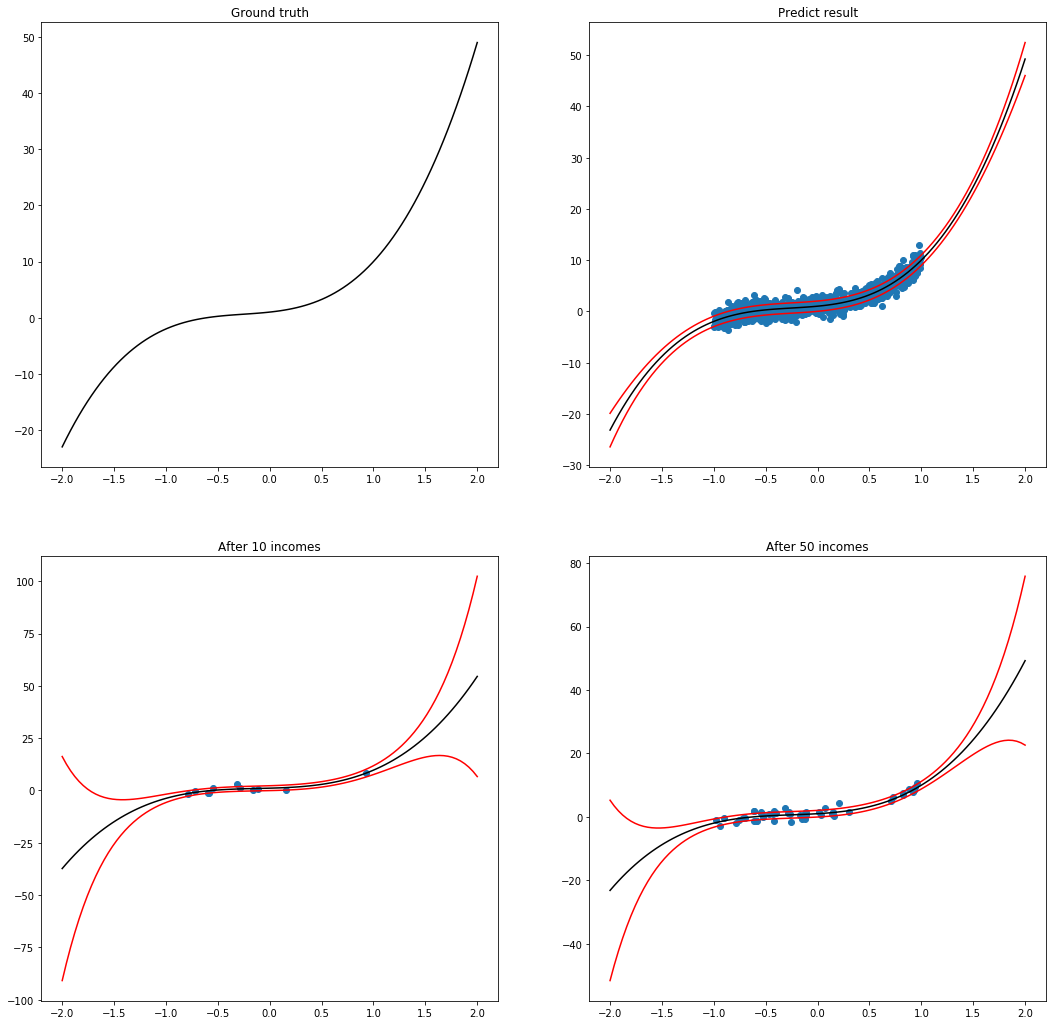

In [33]:
# visualize the result

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(18, 18)

line_x = np.linspace(-2, 2, 100)
line_x_m = np.array([line_x**i for i in range(n)]).T

line_y_1 = line_x_m.dot(w)
ax1.plot(line_x, line_y_1, 'k')
ax1.set_title('Ground truth')

line_y_2 = line_x_m.dot(mean).reshape(-1)
variance = [1/a + x_m.dot(np.linalg.inv(var)).dot(x_m.T) for x_m in line_x_m]
line_var = [line_y_2+variance, line_y_2-variance]
points_x, points_y = [p[0] for p in points], [p[1] for p in points]
ax2.plot(points_x, points_y, 'o')
ax2.plot(line_x, line_y_2, 'k')
ax2.plot(line_x, line_var[0], 'r')
ax2.plot(line_x, line_var[1], 'r')
ax2.set_title('Predict result')

line_y_3 = line_x_m.dot(mean_10).reshape(-1)
variance_10 = [1/a + x_m.dot(np.linalg.inv(var_10)).dot(x_m.T) for x_m in line_x_m]
line_var_10 = [line_y_3+variance_10, line_y_3-variance_10]
points_x_10, points_y_10 = [p[0] for p in points_10], [p[1] for p in points_10]
ax3.plot(points_x_10, points_y_10, 'o')
ax3.plot(line_x, line_y_3, 'k')
ax3.plot(line_x, line_var_10[0], 'r')
ax3.plot(line_x, line_var_10[1], 'r')
ax3.set_title('After 10 incomes')

line_y_4 = line_x_m.dot(mean).reshape(-1)
variance_50 = [1/a + x_m.dot(np.linalg.inv(var_50)).dot(x_m.T) for x_m in line_x_m]
line_var_50 = [line_y_4+variance_50, line_y_4-variance_50]
points_x_50, points_y_50 = [p[0] for p in points_50], [p[1] for p in points_50]
ax4.plot(points_x_50, points_y_50, 'o')
ax4.plot(line_x, line_y_4, 'k')
ax4.plot(line_x, line_var_50[0], 'r')
ax4.plot(line_x, line_var_50[1], 'r')
ax4.set_title('After 50 incomes')